## Heart Disease Mortality Data Among US Adults (35+) by State/Territory and County ##

### Heart diseases prediction with Machine Learning ###

##### 2013 to 2015, 3-year average. Rates are age-standardized. County rates are spatially smoothed. The data can be viewed by gender and race/ethnicity. Data source: National Vital Statistics System. Additional data, maps, and methodology can be viewed on the Interactive Atlas of Heart Disease and Stroke http://www.cdc.gov/dhdsp/maps/atlas #####

##### Heart disease, alternatively known as cardiovascular disease, encases various conditions that impact the heart and has been the primary basis of death worldwide over the past few decades. It associates many risk factors in heart disease and the need for accurate, reliable, and sensible approaches to make an early diagnosis to achieve prompt management of the disease. Machine Learning is a commonly used technique for processing enormous amounts of data in the healthcare domain. Researchers apply several data mining and machine learning techniques to analyze complex medical data, helping healthcare professionals predict heart disease.
#####

In [27]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score;
import joblib


### Importing and understanding our dataset ###

In [29]:
import pandas as pd

url = "https://data.cdc.gov/api/views/i2vk-mgdh/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
print(df.head())
df.head(5)

   Year LocationAbbr    LocationDesc GeographicLevel DataSource  \
0  2014           AK  Aleutians East          County       NVSS   
1  2014           AK  Aleutians West          County       NVSS   
2  2014           AK       Anchorage          County       NVSS   
3  2014           AK          Bethel          County       NVSS   
4  2014           AK     Bristol Bay          County       NVSS   

                     Class                    Topic  Data_Value  \
0  Cardiovascular Diseases  Heart Disease Mortality       105.3   
1  Cardiovascular Diseases  Heart Disease Mortality       211.9   
2  Cardiovascular Diseases  Heart Disease Mortality       257.9   
3  Cardiovascular Diseases  Heart Disease Mortality       351.6   
4  Cardiovascular Diseases  Heart Disease Mortality         NaN   

          Data_Value_Unit                                    Data_Value_Type  \
0  per 100,000 population  Age-adjusted, Spatially Smoothed, 3-year Avera...   
1  per 100,000 population  Age-adj

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


### Printing out a few columns ###

In [21]:
value_counts = df['Data_Value_Type'].value_counts()
print(value_counts)

Age-adjusted, Spatially Smoothed, 3-year Average Rate    58050
Age-adjusted, 3-year Average Rate                         1026
Name: Data_Value_Type, dtype: int64


## Data Cleaning

In [73]:

# Check for missing values
missing_values = df.isnull().sum()

# Fill or drop missing values (for simplicity, let's drop rows with missing 'Data_Value')
df_cleaned = df.dropna(subset=['Data_Value'])

# Check for duplicate entries
duplicates = df_cleaned.duplicated().sum()

# Convert relevant columns to appropriate types (e.g., Year to int, LocationAbbr to category)
df_cleaned['Year'] = df_cleaned['Year'].astype(int)
df_cleaned['LocationAbbr'] = df_cleaned['LocationAbbr'].astype('category')

# Check the cleaned data
df_cleaned.head(), missing_values, duplicates



/var/folders/_k/31bdqfl15sx7lg5rdhpc97q00000gn/T/ipykernel_68653/4074522965.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Year'].astype(int)
/var/folders/_k/31bdqfl15sx7lg5rdhpc97q00000gn/T/ipykernel_68653/4074522965.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LocationAbbr'] = df_cleaned['LocationAbbr'].astype('category')


(   Year LocationAbbr    LocationDesc GeographicLevel DataSource  \
 0  2014           AK  Aleutians East          County       NVSS   
 1  2014           AK  Aleutians West          County       NVSS   
 2  2014           AK       Anchorage          County       NVSS   
 3  2014           AK          Bethel          County       NVSS   
 5  2014           AK          Denali          County       NVSS   
 
                      Class                    Topic  Data_Value  \
 0  Cardiovascular Diseases  Heart Disease Mortality       105.3   
 1  Cardiovascular Diseases  Heart Disease Mortality       211.9   
 2  Cardiovascular Diseases  Heart Disease Mortality       257.9   
 3  Cardiovascular Diseases  Heart Disease Mortality       351.6   
 5  Cardiovascular Diseases  Heart Disease Mortality       305.5   
 
           Data_Value_Unit                                    Data_Value_Type  \
 0  per 100,000 population  Age-adjusted, Spatially Smoothed, 3-year Avera...   
 1  per 100,000 po

# Creating a pivot table to show the average heart disease mortality by year and location

In [111]:
# Creating a pivot table to show the average heart disease mortality by year and location
pivot_table = df_cleaned.pivot_table(
    values='Data_Value',  # The column we want to aggregate
    index='Year',         # Rows of the pivot table (by year)
    columns='LocationAbbr',  # Columns of the pivot table (by location)
    aggfunc='mean',       # Aggregate function (mean in this case)
    fill_value=0          # Fill missing values with 0


# Display the pivot table
print(pivot_table)


LocationAbbr          AK          AL          AR          AS          AZ  \
Year                                                                       
2014          318.396517  452.940996  447.272996  343.533333  272.962357   

LocationAbbr          CA          CO          CT          DC          DE  ...  \
Year                                                                      ...   
2014          298.068489  247.797399  255.655882  306.178571  270.705172  ...   

LocationAbbr          TX     US          UT          VA    VI          VT  \
Year                                                                        
2014          362.380342  301.7  273.006774  327.246877  88.3  305.188421   

LocationAbbr          WA         WI          WV          WY  
Year                                                         
2014          271.518182  309.55039  386.078851  313.842512  

[1 rows x 57 columns]


### Description ###

In [35]:
df.describe()

,Year,Data_Value,LocationID
count,59076.0,32149.000000,59076.000000
mean,2014.0,349.306775,30946.267215
std,0.0,140.549773,16728.893538
min,2014.0,6.000000,0.000000
25%,2014.0,253.300000,18137.000000
50%,2014.0,340.000000,29208.000000
75%,2014.0,433.800000,46091.000000
max,2014.0,3000.900000,78030.000000


## Initial Data Analysis ##
## Count the instances of disease and no disease. ##

In [48]:
disease = len(df[df['Data_Value'] == 1])
no_disease = len(df[df['Data_Value']== 0])

In [50]:
value_counts = df['Data_Value'].value_counts()
print(value_counts)

335.7    21
349.2    21
285.6    20
343.5    19
361.1    19
         ..
906.8     1
842.7     1
883.6     1
933.8     1
42.4      1
Name: Data_Value, Length: 6147, dtype: int64


## Visualize ##

/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


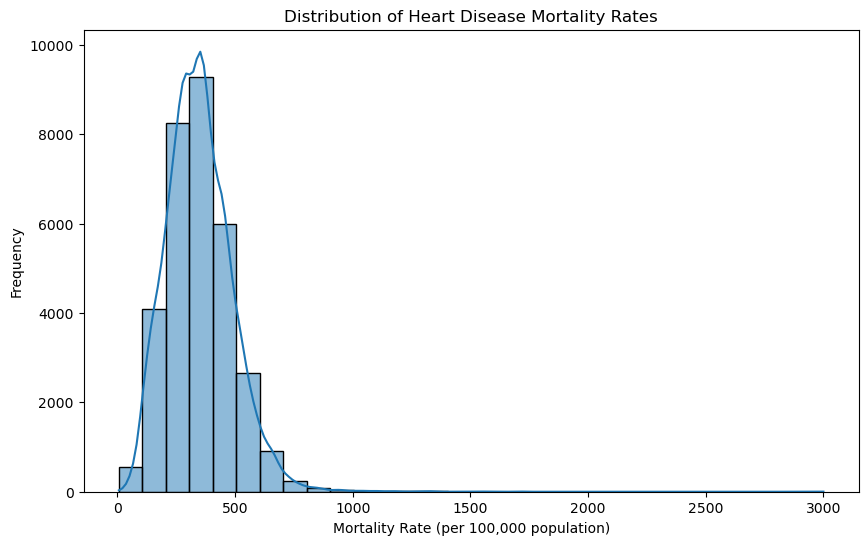

In [11]:
# Reimporting necessary libraries and reloading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Data_Value (Heart Disease Mortality)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Data_Value'], bins=30, kde=True)
plt.title('Distribution of Heart Disease Mortality Rates')
plt.xlabel('Mortality Rate (per 100,000 population)')
plt.ylabel('Frequency')
plt.show()

In [129]:
# Inspect unique values in the 'Class' column to check the actual categories
print(df_cleaned['Class'].unique())

# Check for missing or incorrectly labeled values in the 'Class' column
print(df_cleaned['Class'].value_counts())

# Remove any NaN values in the 'Class' column using .loc to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.dropna(subset=['Class'])

# Count occurrences of each target value (Heart Disease vs No Disease)
disease = df_cleaned[df_cleaned['Class'] == 'Heart Disease'].shape[0]
no_disease = df_cleaned[df_cleaned['Class'] == 'No Disease'].shape[0]

# Check if both categories have non-zero counts
if disease == 0 or no_disease == 0:
    print("Error: One or both of the categories (Heart Disease or No Disease) have zero entries.")
else:
    # Pie chart data
    sizes = [disease, no_disease]
    labels = ['Heart Disease', 'No Disease']

    # Plotting the pie chart
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.title('Percentage of Target: Heart Disease vs No Disease', size=16)
    plt.show()



['Cardiovascular Diseases']
Cardiovascular Diseases    32149
Name: Class, dtype: int64
Error: One or both of the categories (Heart Disease or No Disease) have zero entries.


In [47]:
df['Data_Value'].unique()


array([105.3, 211.9, 257.9, ..., 121. ,  45.2,  42.4])

### Analysing the 'target' variable ###

In [46]:
df["Data_Value"].describe()

count    32149.000000
mean       349.306775
std        140.549773
min          6.000000
25%        253.300000
50%        340.000000
75%        433.800000
max       3000.900000
Name: Data_Value, dtype: float64

### Clearly, this is a classification problem, with the target variable having values '0' and '1'###
#### Checking correlation between columns ####

In [49]:
# Calculate correlations and sort them
correlations = df.corr(numeric_only=True)["Data_Value"].abs().sort_values(ascending=False)
print(correlations)

Data_Value    1.000000
LocationID    0.015145
Year               NaN
Name: Data_Value, dtype: float64


In [50]:
#This shows that most columns are moderately correlated with target

In [88]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [40]:
# more example
qualitative

['Year',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID']

In [42]:
# more example
quantitative

['LocationAbbr', 'LocationDesc', 'Data_Value', 'LocationID', 'Location 1']

### Top correlated features of dataset ###

/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


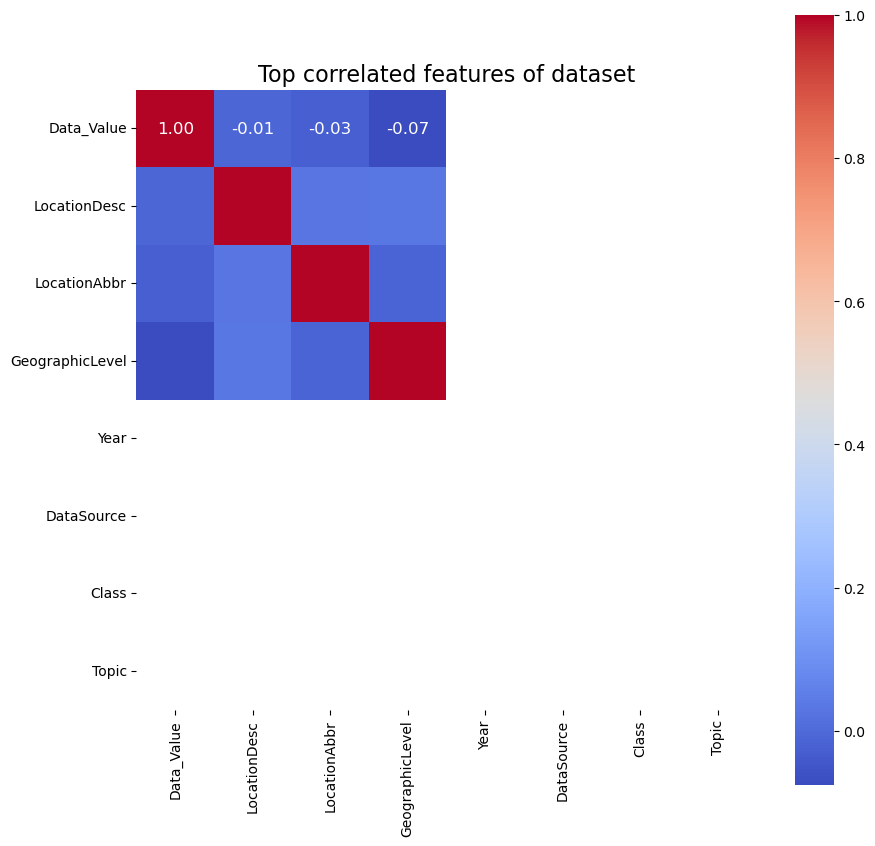

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = data_cleaned.corr(numeric_only=True)

# Get the top 15 features most correlated with 'Data_Value'
top = 15
top15 = corr.nlargest(top, 'Data_Value')['Data_Value'].index

# Create a correlation matrix for the top 15 features
corr_top15 = data_cleaned[top15].corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Top correlated features of dataset', size=16)
plt.show()


/var/folders/_k/31bdqfl15sx7lg5rdhpc97q00000gn/T/ipykernel_68653/4035389717.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()
/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


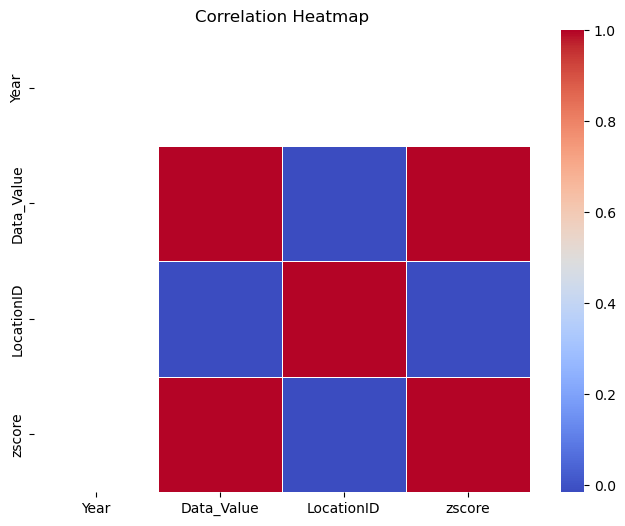

In [86]:
# Step 2: Further EDA with correlation analysis

# Check for correlation between numerical columns
correlation_matrix = df_cleaned.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


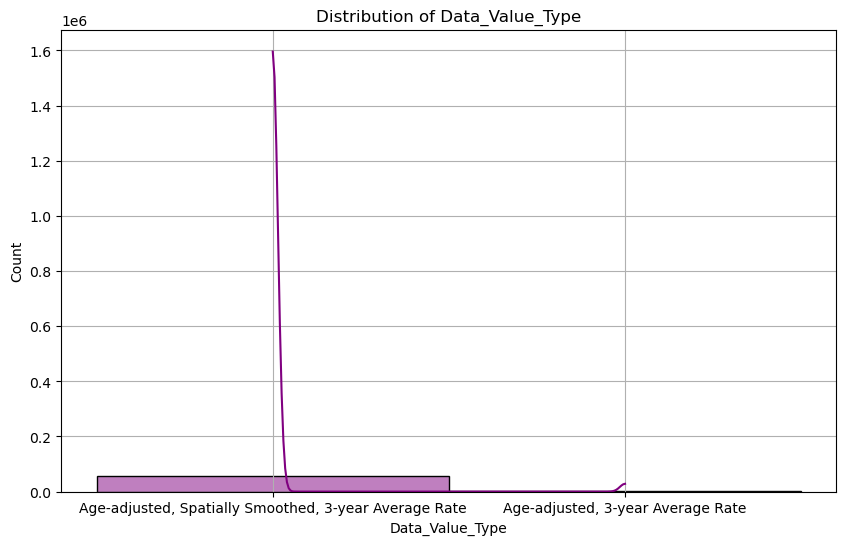

In [60]:

# Suppress warnings
warnings.filterwarnings('ignore')

# Check if 'Data_Value_Type' column exists
if 'Data_Value_Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Data_Value_Type'], kde=True, bins=30, color='purple')  
    plt.title('Distribution of Data_Value_Type')
    plt.xlabel('Data_Value_Type')
    plt.ylabel('Count')  # Adjust ylabel based on your actual data interpretation
    plt.grid(True)
    plt.show()
else:
    print("Column 'Data_Value_Type' not found in the dataset. Available columns are:", df.columns)



#### Seaborn visualizing with creating plots that pairwise relationships in a dataset. ####

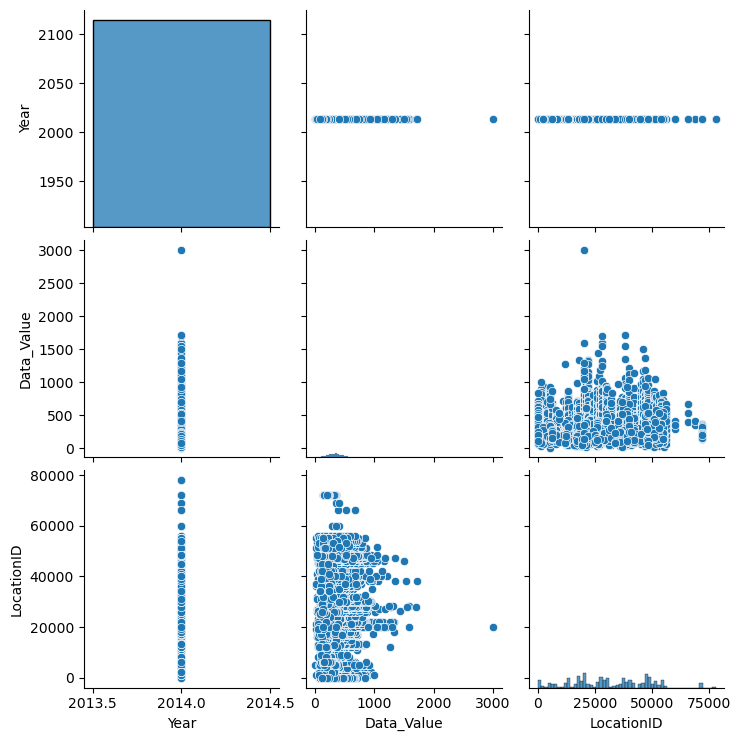

In [62]:
sns.pairplot(df)

## RandomForestRegressor ##

## The accuracy score achieved using Random Forest ##

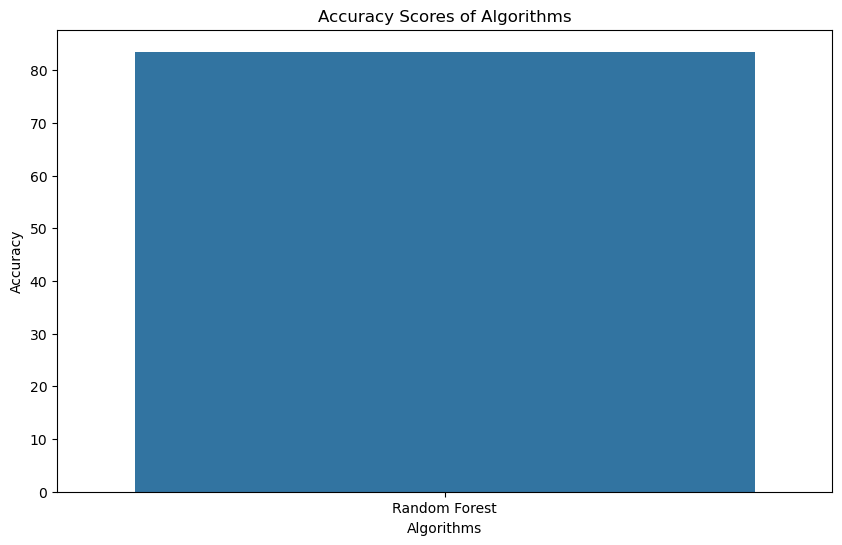

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import os


# Accuracy scores for algorithms (example values)
algorithms = ["Random Forest"]
scores = [83.5]  # Example accuracy score for Random Forest

# Create a DataFrame from algorithms and scores
data = pd.DataFrame({'Algorithms': algorithms, 'Accuracy': scores})

# Set the plot size
plt.figure(figsize=(10, 6))

# Plot the barplot using Seaborn
sns.barplot(x='Algorithms', y='Accuracy', data=data)

# Set labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores of Algorithms")

# Show the plot
plt.show()

In [99]:
model_file = 'heart_disease_regressor_model.pkl'
label_encoders_file = 'label_encoders.pkl'
scaler_file = 'scaler.pkl'

# Check current directory contents
print(os.listdir())

# Check if the model file exists
if not os.path.exists(model_file):
    print(f"Error: {model_file} not found. Please check the file path.")
else:
    # Load the saved model
    loaded_model = joblib.load(model_file)
    
    # Load label encoders and scaler
    if os.path.exists(label_encoders_file) and os.path.exists(scaler_file):
        label_encoders = joblib.load(label_encoders_file)
        scaler = joblib.load(scaler_file)
    else:
        print("Error: label_encoders.pkl or scaler.pkl not found. Please check the file path.")
        exit()
    
    try:
        # Prepare new data
        new_data = pd.DataFrame({
            'Year': [2022],
            'LocationAbbr': [label_encoders['LocationAbbr'].transform(['AK'])[0]], 
            'LocationDesc': [label_encoders['LocationDesc'].transform(['Anchorage'])[0]], 
            'GeographicLevel': [label_encoders['GeographicLevel'].transform(['County'])[0]],  
            'DataSource': [label_encoders['DataSource'].transform(['NVSS'])[0]],  
            'Class': [label_encoders['Class'].transform(['Cardiovascular Diseases'])[0]],  
            'Topic': [label_encoders['Topic'].transform(['Heart Disease Mortality'])[0]] 
        })

        # Scale the new data
        new_data_scaled = scaler.transform(new_data)

        # Predict the heart disease mortality rate
        prediction = loaded_model.predict(new_data_scaled)

        print(f'Predicted Heart Disease Mortality Rate: {prediction[0]}')
    
    except Exception as e:
        print(f"Error during prediction: {e}")



['scaler.pkl', 'random_forest_model.pkl', 'unique_values.xlsx', '.DS_Store', 'target_label_encoder.pkl', '(Practice)heart_disease_regressor_model.ipynb', 'heart_disease_regressor_model(turkish).ipynb', 'Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv', 'heart_disease_regressor_model.pkl', 'selected_columns.xlsx', 'label_encoders.pkl', '.ipynb_checkpoints']
Error during prediction: 'LocationDesc'


In [95]:
## Another accuracy metric

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 4: Feature Importance Visualization (for Random Forest)
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances for Mortality Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Step 5: Visualize the Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label="Ideal fit")
plt.title('Actual vs Predicted Heart Disease Mortality')
plt.xlabel('Actual Mortality Rate')
plt.ylabel('Predicted Mortality Rate')
plt.legend()
plt.show()


Mean Squared Error: 16846.95
Root Mean Squared Error: 129.80
R-squared: 0.17


AttributeError: 'ARIMA' object has no attribute 'feature_importances_'

## Example Code for Ad Hoc Analysis

## 1. Regional Comparison (Average Mortality by State)

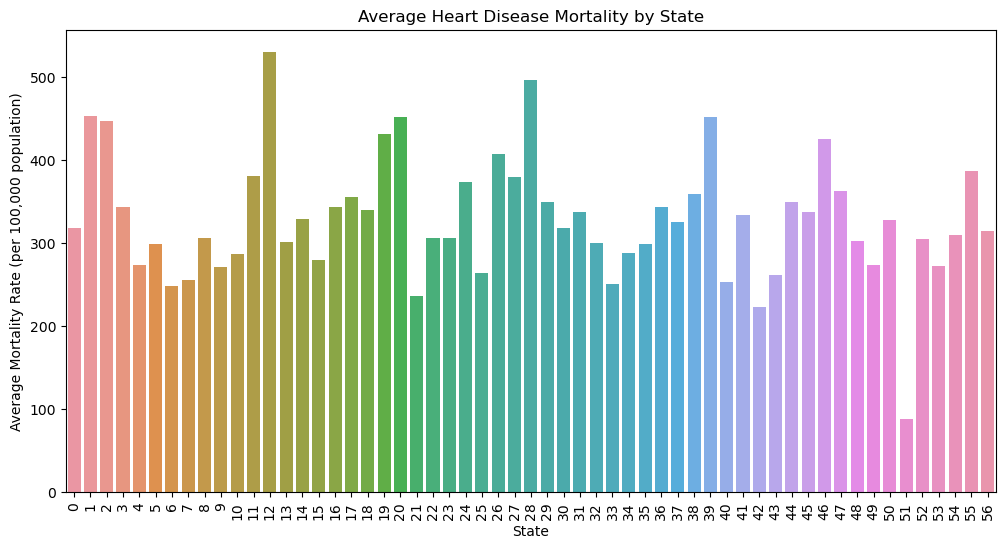

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average mortality rate by state
state_mortality = df_cleaned.groupby('LocationAbbr')['Data_Value'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=state_mortality.index, y=state_mortality.values)
plt.title('Average Heart Disease Mortality by State')
plt.xlabel('State')
plt.ylabel('Average Mortality Rate (per 100,000 population)')
plt.xticks(rotation=90)
plt.show()


## 2. Trend Over Time (Average Mortality per Year

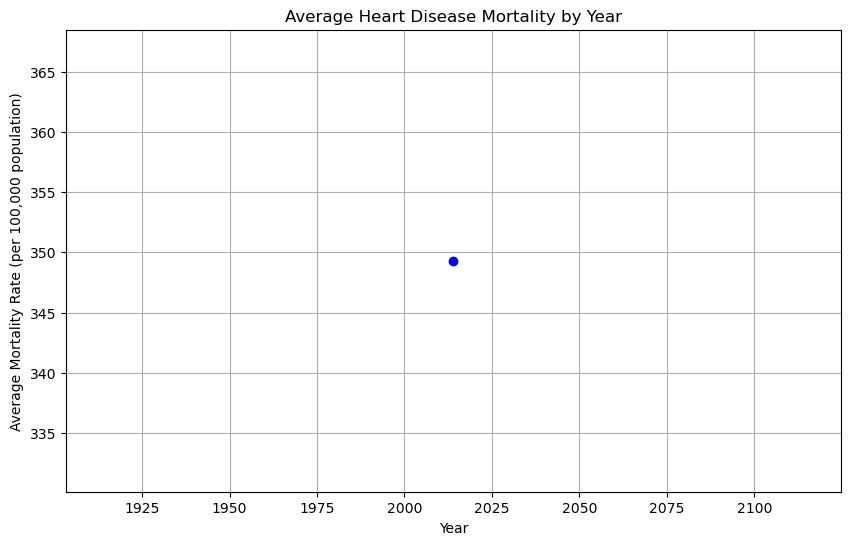

In [71]:
# Yearly average mortality rate
yearly_mortality = df_cleaned.groupby('Year')['Data_Value'].mean()

# Plotting the trend over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_mortality.index, yearly_mortality.values, marker='o', color='b')
plt.title('Average Heart Disease Mortality by Year')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.show()


## 3. Stratification by Gender (Boxplot)

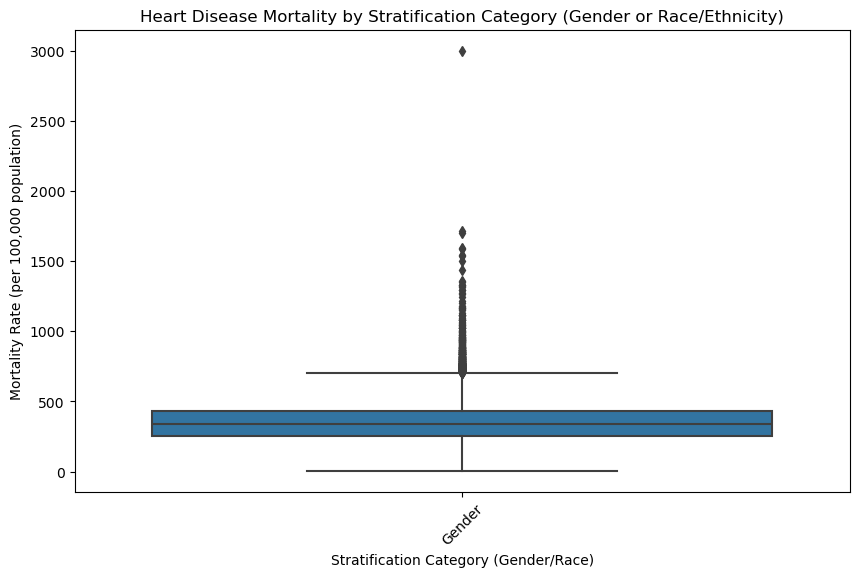

In [76]:
# Stratified by gender or race/ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='StratificationCategory1', y='Data_Value', data=df_cleaned)
plt.title('Heart Disease Mortality by Stratification Category (Gender or Race/Ethnicity)')
plt.xlabel('Stratification Category (Gender/Race)')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.xticks(rotation=45)
plt.show()


## 4. Outlier Detection (Z-Score)

In [79]:
from scipy.stats import zscore

# Calculate Z-scores for 'Data_Value'
df_cleaned['zscore'] = zscore(df_cleaned['Data_Value'].dropna())

# Identify outliers (Z-score > 3 or < -3 is considered an outlier)
outliers = df_cleaned[df_cleaned['zscore'].abs() > 3]

# Display outliers
print(outliers)


       Year LocationAbbr       LocationDesc GeographicLevel DataSource  \
359    2014           AK          Anchorage          County       NVSS   
365    2014           AK    Kenai Peninsula          County       NVSS   
367    2014           AK      Kodiak Island          County       NVSS   
555    2014           AL      Wilcox County          County       NVSS   
754    2014           AL      Walker County          County       NVSS   
...     ...          ...                ...             ...        ...   
55288  2014           KS     Kingman County          County       NVSS   
55364  2014           TN  Rutherford County          County       NVSS   
55579  2014           KS      Sumner County          County       NVSS   
56280  2014           KS      Harvey County          County       NVSS   
57168  2014           OH     Portage County          County       NVSS   

                         Class                    Topic  Data_Value  \
359    Cardiovascular Diseases  Heart Di

/var/folders/_k/31bdqfl15sx7lg5rdhpc97q00000gn/T/ipykernel_68653/985440103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['zscore'] = zscore(df_cleaned['Data_Value'].dropna())


## 5. Forecasting with ARIMA

Forecasted mortality rates for the next 5 years: 1    349.306775
2    349.306775
3    349.306775
4    349.306775
5    349.306775
Name: predicted_mean, dtype: float64


/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sehribanceliker/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sehriba

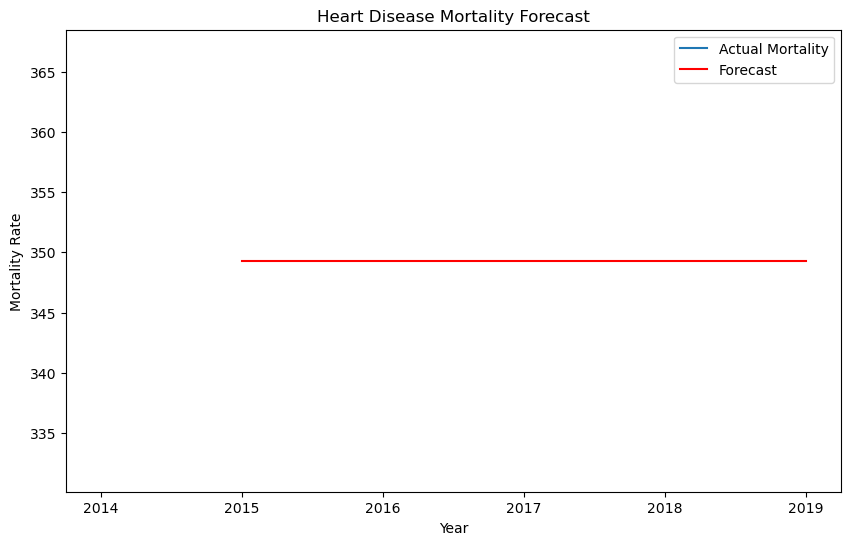

In [82]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare data for ARIMA (using 'Year' as the index and 'Data_Value' as the target)
df_time_series = df_cleaned.groupby('Year')['Data_Value'].mean()

# Fit ARIMA model
model = ARIMA(df_time_series, order=(1, 1, 1))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecast for the next 5 years
forecast = model_fit.forecast(steps=5)
print(f"Forecasted mortality rates for the next 5 years: {forecast}")

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_time_series.index, df_time_series.values, label='Actual Mortality')
plt.plot(range(df_time_series.index[-1] + 1, df_time_series.index[-1] + 6), forecast, color='red', label='Forecast')
plt.title('Heart Disease Mortality Forecast')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.show()


In [123]:
import zipfile
import os

# Define the path to your notebook (use the correct file path from your system)
notebook_path = '/Users/sehribanceliker/Desktop/PROJECTS/Heart_Disease/notebooks/(Practice)heart_disease_regressor_model.ipynb'

# Define the path where you want to save the zip file
zip_path = '/Users/sehribanceliker/Desktop/Heart_Disease.zip'

# Check if the notebook file exists
if os.path.exists(notebook_path):
    # Create a zip file and add the notebook to it
    with zipfile.ZipFile(zip_path, 'w') as zipf:
        zipf.write(notebook_path, os.path.basename(notebook_path))
    
    print(f"Notebook zipped successfully and saved to {zip_path}")
else:
    print(f"The file at {notebook_path} does not exist. Please check the path.")




Notebook zipped successfully and saved to /Users/sehribanceliker/Desktop/Heart_Disease.zip
